<a href="https://colab.research.google.com/github/jazz-dev/solid-broccoli-AI/blob/main/image_classification_into_10_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

#loading data
(train_images, train_labels), \
 (test_images, test_labels) = mnist.load_data()

#reshaping data -  adding no of channels as 1(Grayscale images)
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

#normalising data
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

#encoding labels into binary class matrix
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#Model Architecture
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

val_images = train_images[:10000]
partial_images = train_images[10000:]
val_labels = y_train[:10000]
partial_labels = y_train[10000:]

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True, mode = "min")

history = model.fit(partial_images, partial_labels, batch_size = 128, epochs = 25, validation_data = (val_images, val_labels), callbacks = [earlystopping])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 106ms/step - accuracy: 0.8178 - loss: 0.5647 - val_accuracy: 0.9666 - val_loss: 0.1092
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 111ms/step - accuracy: 0.9766 - loss: 0.0747 - val_accuracy: 0.9814 - val_loss: 0.0652
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.9858 - loss: 0.0475 - val_accuracy: 0.9787 - val_loss: 0.0736
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9900 - loss: 0.0332 - val_accuracy: 0.9865 - val_loss: 0.0470
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.9855 - val_loss: 0.0477
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9942 - loss: 0.0195 - val_accuracy: 0.9882 - val_loss: 0.0448
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9955 - loss: 0.0150 - val_accuracy: 0.9871 - val_loss: 0.0454
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9965 - loss: 0

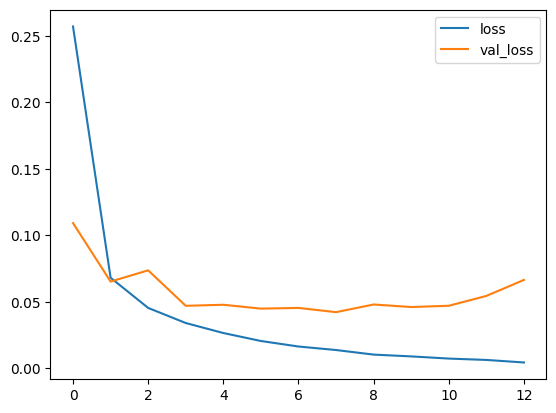

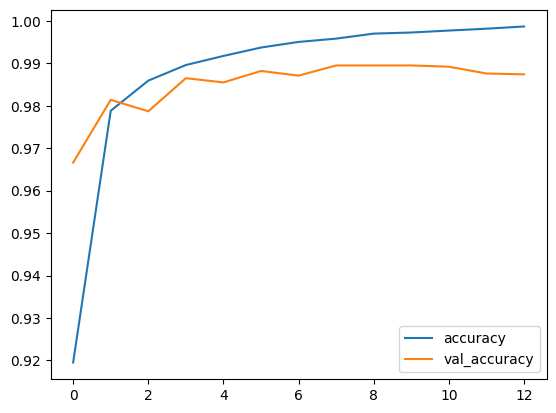

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
